<a href="https://colab.research.google.com/github/Sagor0078/Deep-Learning/blob/main/ImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.4
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

In [6]:
data_dir = '/content/drive/MyDrive/ImageClassifier/ImageClassification/data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/ImageClassifier/ImageClassification/data')

Found 305 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

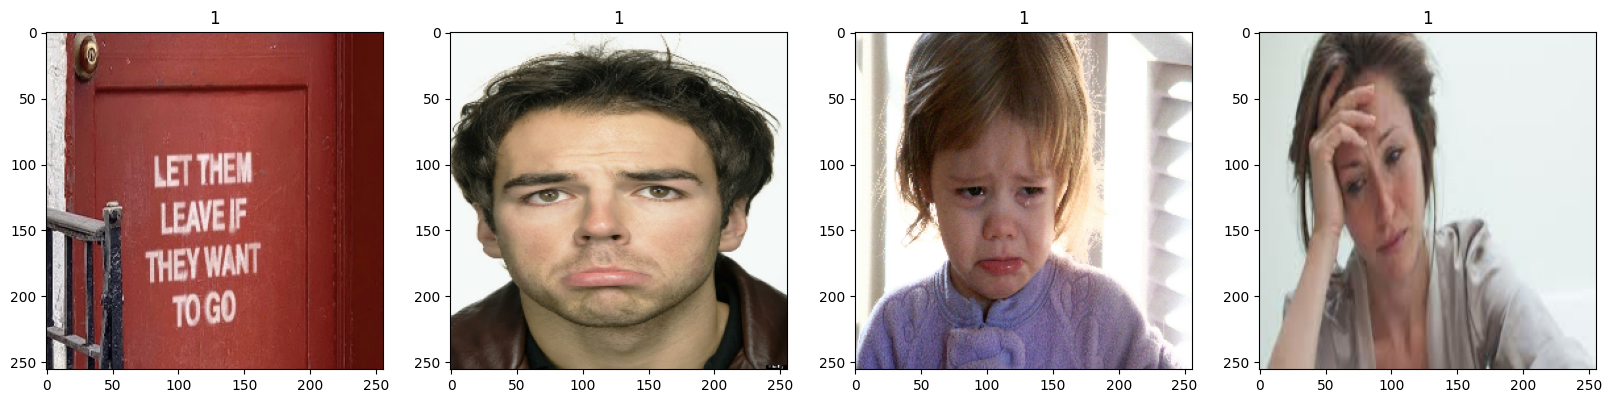

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          ...,
          [0.99215686, 0.6627451 , 0.03529412],
          [0.99215686, 0.6627451 , 0.03529412],
          [0.9957414 , 0.6663297 , 0.03887868]],
 
         [[1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          ...,
          [0.99215686, 0.6627451 , 0.03529412],
          [0.99215686, 0.6627451 , 0.03529412],
          [0.9957414 , 0.6663297 , 0.03887868]],
 
         [[1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          [1.        , 0.65882355, 0.03529412],
          ...,
          [0.99215686, 0.6627451 , 0.03529412],
          [0.99215686, 0.6627451 , 0.03529412],
          [0.9957414 , 0.6663297 , 0.03887868]],
 
         ...,
 
         [[1.        , 0.65882355, 0.03529412],
          [1.     

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 28s 3s/step - loss: 1.2080 - accuracy: 0.4911 - val_loss: 0.7353 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 33s 4s/step - loss: 0.6907 - accuracy: 0.5580 - val_loss: 0.6709 - val_accuracy: 0.5156
Epoch 3/20
7/7 [==============================] - 26s 3s/step - loss: 0.6209 - accuracy: 0.6473 - val_loss: 0.7719 - val_accuracy: 0.5156
Epoch 4/20
7/7 [==============================] - 31s 4s/step - loss: 0.6327 - accuracy: 0.6696 - val_loss: 0.5269 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 30s 4s/step - loss: 0.5705 - accuracy: 0.6473 - val_loss: 0.5175 - val_accuracy: 0.6562
Epoch 6/20
7/7 [==============================] - 25s 3s/step - loss: 0.5221 - accuracy: 0.8080 - val_loss: 0.4560 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 30s 4s/step - loss: 0.4061 - accuracy: 0.8750 - val_loss: 0.2694 - val_accuracy: 0.8906
Epoch 8/20
7/7 [==================

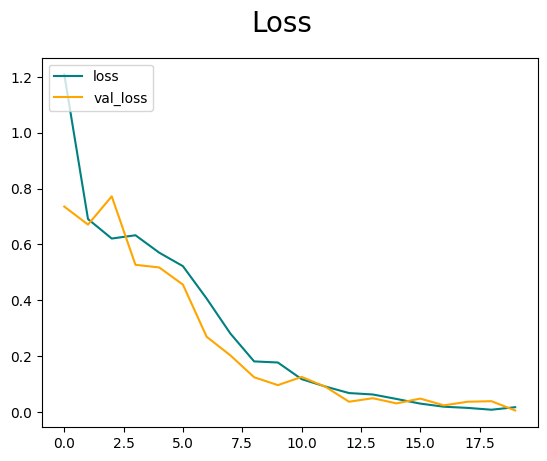

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

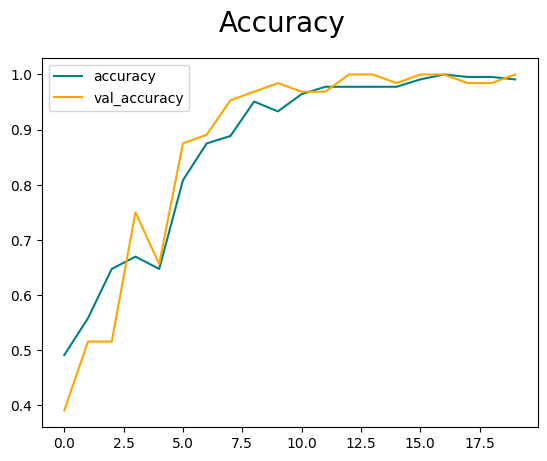

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 479ms/step


In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [37]:
import cv2

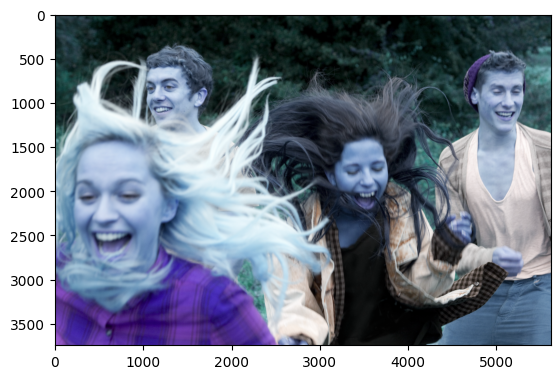

In [39]:
img = cv2.imread('/content/drive/MyDrive/ImageClassifier/ImageClassification/154006829.jpg')
plt.imshow(img)
plt.show()

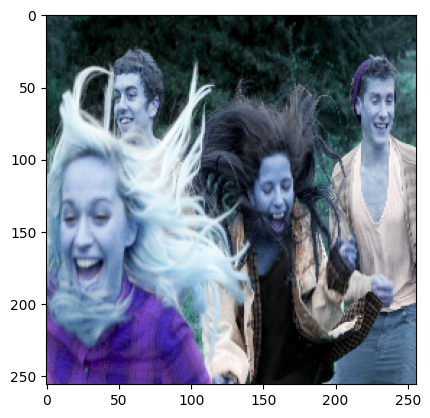

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


In [42]:
yhat

array([[0.01787406]], dtype=float32)

In [43]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
